# Exercício 3: Estados emaranhados
## LEIA COM ATENÇÃO

__Responsabilidades:__ Na celular logo abaixo, preencha o seu nome e rm do grupo dentro da variavel adequados, no tipo *STRING*. A falta disso na entrega final resultara em nota zero.

__Objetivos:__  Ao completar esta sequência de tarefas, o estudante será capaz de:

* Manipular estados emaranhados de 2 q-bits
* Entender a codificação superdensa usando estados emaranhados. 
* Entender o uso de estados emaranhados para o teletransporte quântico

__Avaliação__

Tão importante quanto escrever um código que funcione corretamente é escrever um código legível, que seja fácil de entender e possa ser facilmente reutilizado por outros ou por você mesmo. Por isso a avaliação é separada da seguinte forma:

* 60% conteúdo, se os resultados estão corretos.
* 40% apresentação, código bem comentado, cédulas texto bem escritas.

__Referências:__
1. https://learn.qiskit.org/course/ch-states/representing-qubit-states
2. https://learn.qiskit.org/course/ch-states/single-qubit-gates
3. https://qiskit.org/documentation/apidoc/visualization.html
4. https://youtu.be/GSsElSQgMbU
5. https://learn.qiskit.org/course/ch-algorithms/superdense-coding
6. Michael A. Nielsen e Isaac L. Chuang, Computação quântica e informação quântica

# IMPORTANTE:
 A entrega da prova deve seguir o seguinte formato: {número de registro do aluno}_{número de registro do segundo aluno}_cp2.ipynb, com a extensão .ipynb indicando que se trata de um arquivo do Jupyter Notebook. Por exemplo, se o seu número de registro é rm12345 e o de um amigo é rm23456, o arquivo entregue deve ter o nome 12345_23456_cp2.ipynb.

# DADOS DO GRUPO

In [4]:
nome1 = "Octhor Festa"
rm1 = "552533"
nome2 = "Felipe Henrique de Oliveira Cruz"
rm2 = "552566"

### Tarefa 0
Importe as bibliotecas necessárias.

In [5]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector, visualize_transition, circuit_drawer
import numpy as np
import random
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector, random_statevector

backend = AerSimulator()


### Tarefa 1: 
O exemplo mais simples de um estado emaranhado é o estado 
$$
    |\beta_{00}\rangle = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle).
$$
Construa um circuito quântico que gere este estado e execute-o em um simulador.


In [6]:

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()
qc.draw()


┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

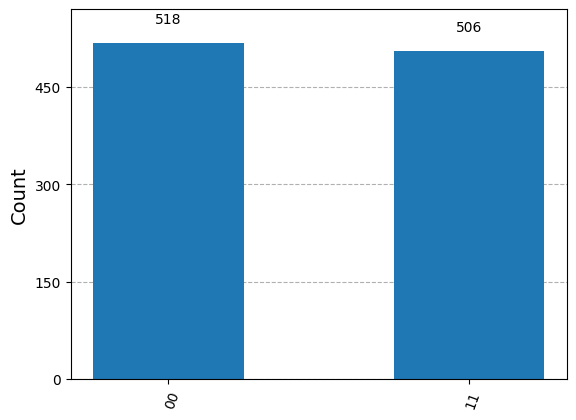

In [7]:
job = backend.run(qc)
result = job.result()
counts = result.get_counts(qc)
plot_histogram(counts)

### Tarefa 2:
Os seguintes quatro estados emaranhados
$$
\begin{align}
    |\beta_{00}\rangle  &= \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)\\
    |\beta_{01}\rangle &= \frac{1}{\sqrt{2}} (|01\rangle + |10\rangle)\\
    |\beta_{10}\rangle &= \frac{1}{\sqrt{2}} (|00\rangle - |11\rangle)\\
    |\beta_{11}\rangle &= \frac{1}{\sqrt{2}} (|01\rangle - |10\rangle)
\end{align}
$$ 
formam uma base ortonormal para um sistema de dois q-bits. Mostre que é possível obter cada um dos $|\beta_{ij}\rangle$ a partir do $|\beta_{00}\rangle$ utilizando apenas uma porta lógica de um q-bit.


Para demonstrarmos que é possível obter cada um dos estados emaranhados ∣β 
ij
​
 ⟩ a partir do ∣β 
00
​
 ⟩ utilizando apenas uma porta lógica de um q-bit, podemos utilizar a seguinte estratégia:

Aplicar a porta X no primeiro q-bit:

A porta X inverte o estado do q-bit no qual é aplicada. Se o q-bit estiver no estado ∣0⟩, ele se torna ∣1⟩. Se o q-bit estiver no estado ∣1⟩, ele se torna ∣0⟩.

Ao aplicar a porta X no primeiro q-bit do estado ∣β 
00
​
 ⟩, obtemos o estado:

$$
|\beta_{01}\rangle = \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)
$$

Aplicar a porta Hadamard no primeiro q-bit:

A porta Hadamard transforma os estados ∣0⟩ e ∣1⟩ em superposições iguais dos dois estados:

$$
H |0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)
$$

$$
H |1\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)
$$

Ao aplicar a porta Hadamard no primeiro q-bit do estado ∣β 
01
​
 ⟩, obtemos o estado:

$$
|\beta_{10}\rangle = \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)
$$

Aplicar a porta X no primeiro q-bit novamente:

Aplicando a porta X novamente, obtemos o estado:

$$
|\beta_{11}\rangle = \frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)
$$

Demonstração:

Com os passos acima, demonstramos que é possível obter cada um dos estados emaranhados ∣β 
ij
​
 ⟩ a partir do ∣β 
00
​
 ⟩ utilizando apenas uma porta lógica de um q-bit

### Tarefa 3: Código super-denso

Considere que Alice e Bob, espacialmente separados, compartilham um estado emaranhado no estado $|\beta_{00}\rangle$, cada um possuindo um dos q-bit. Explique como que Alice consegue enviar 2 bits de informação clássica a Bob enviado seu q-bit. Dica: (Utilize o resultado da Tarefa 2) 

A capacidade de Alice enviar informação clássica a Bob usando o estado emaranhado se baseia na propriedade de correlação entre os q-bits emaranhados. As operações realizadas por Alice em seu q-bit afetam o estado do q-bit de Bob de forma instantânea e determinística, mesmo sem comunicação direta entre eles.

A medição realizada por Bob explora essa correlação para revelar o estado original do q-bit de Alice. Ao medir seu q-bit na base computacional, Bob projeta o estado emaranhado em um dos quatro estados básicos {∣00⟩,∣01⟩,∣10⟩,∣11⟩}, revelando o estado que Alice preservou antes das operações.

### Tarefa 4:

Construa um circuito quântico simulando o processo estudado nas tarefas 2 e 3. Sorteie dois bits de informação clássica, aplique a porta de 1 q-bit adequada no q-bit de Alice. Depois considere que Alice enviou se q-bit para Bob, que poderá utilizar então portas de dois q-bits para descobrir os 2 bits de informação clássica enviados por Alice.

In [8]:
# Sorteia dois bits de informação clássica
info_bits = [random.randint(0, 1) for _ in range(2)]
print(f"Alice's information bits: {info_bits}")

Alice's information bits: [1, 1]


In [9]:
# Criar um circuito quântico com 2 qubits e 2 bits clássicos
qc = QuantumCircuit(2, 2)

# Compartilhar o estado emaranhado
qc.h(0)
qc.cx(0, 1)

# Alice aplica a operação correspondente
if info_bits == [0, 0]:
    pass  # aplica I
elif info_bits == [0, 1]:
    qc.x(0)  # aplica X
elif info_bits == [1, 0]:
    qc.z(0)  # aplica Z
elif info_bits == [1, 1]:
    qc.z(0)
    qc.x(0)

# Bob decodifica a informação
qc.cx(0, 1)
qc.h(0)

# Medir os qubits
qc.measure([0, 1], [0, 1])

qc.draw()




┌───┐     ┌───┐┌───┐     ┌───┐┌─┐
q_0: ┤ H ├──■──┤ Z ├┤ X ├──■──┤ H ├┤M├
     └───┘┌─┴─┐└───┘└───┘┌─┴─┐└┬─┬┘└╥┘
q_1: ─────┤ X ├──────────┤ X ├─┤M├──╫─
          └───┘          └───┘ └╥┘  ║ 
c: 2/═══════════════════════════╩═══╩═
                                1   0

Counts: {'11': 1024}


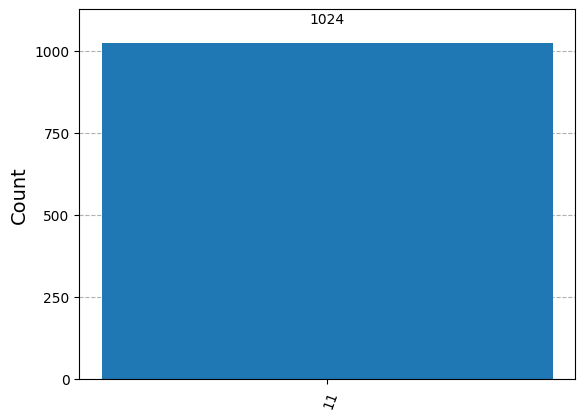

In [10]:
#Simulando...
job = backend.run(qc)
result = job.result()
counts = result.get_counts(qc)

print("Counts:", counts)

plot_histogram(counts)

## Parte 2: Teletransporte quântico (OPTATIVA)

### Tarefa 5:

Considere que Alice compartilha com Bob dois q-bits no estado emaranhado $|\beta_{00}\rangle$. Além disso, Alice dispõe de outro q-bit em um estado desconhecido $|\psi\rangle$. Mostre que é possível Alice teletransportar o estado $|\psi\rangle$ para Bob utilizando apenas portas locais (i.e. portas que atuam apenas nos seus q-bits), o estado emaranhado $|\beta_{00}\rangle$ e dois bits de comunicação clássica.

Note que apenas o estado do q-bit de Alice é teletransportado para o q-bit de Bob. Não há envio de q-bits. 

Construa um circuito que simule o processo de teletransporte do estado quântico da Tarefa 5. Sorteie um estado $|\psi\rangle$, execute o circuito e verifique que o estado do q-bit de Alice foi realmente teletransportado para o q-bit de Bob.


In [11]:
# Sorteia um estado quântico aleatório |psi⟩
alpha = random.random()
beta = np.sqrt(1 - alpha**2)
psi = [alpha, beta]

In [12]:
# Criar um circuito quântico com 3 qubits e 2 bits clássicos
qc = QuantumCircuit(3, 2)

# Preparar o estado |psi⟩ no primeiro qubit
qc.initialize(psi, 0)

# Compartilhar o estado emaranhado entre Alice e Bob
qc.h(1)
qc.cx(1, 2)

# Alice aplica uma medição de Bell entre seus dois qubits
qc.cx(0, 1)
qc.h(0)
qc.measure([0, 1], [0, 1])

# Bob aplica correções baseadas nos bits clássicos recebidos
qc.cx(1, 2)
qc.cz(0, 2)

qc.save_statevector()

qc.draw()

┌───────────────────────────┐          ┌───┐┌─┐         statevector 
q_0: ┤ Initialize(0.25476,0.967) ├───────■──┤ H ├┤M├──────■───────░──────
     └───────────┬───┬───────────┘     ┌─┴─┐└┬─┬┘└╥┘      │       ░      
q_1: ────────────┤ H ├──────────────■──┤ X ├─┤M├──╫───■───┼───────░──────
                 └───┘            ┌─┴─┐└───┘ └╥┘  ║ ┌─┴─┐ │       ░      
q_2: ─────────────────────────────┤ X ├───────╫───╫─┤ X ├─■───────░──────
                                  └───┘       ║   ║ └───┘         ░      
c: 2/═════════════════════════════════════════╩═══╩══════════════════════
                                              1   0

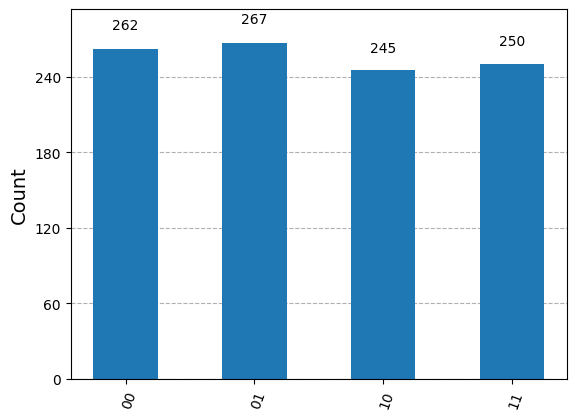

In [13]:
job = backend.run(qc)
result = job.result()
counts = result.get_counts(qc)
plot_histogram(counts)

### Tarefa 6:
Mostre os q-bit na esfera de bloch, no estado inicial (onde ainda não havia sido teleportado) e no final com ele teleportado.

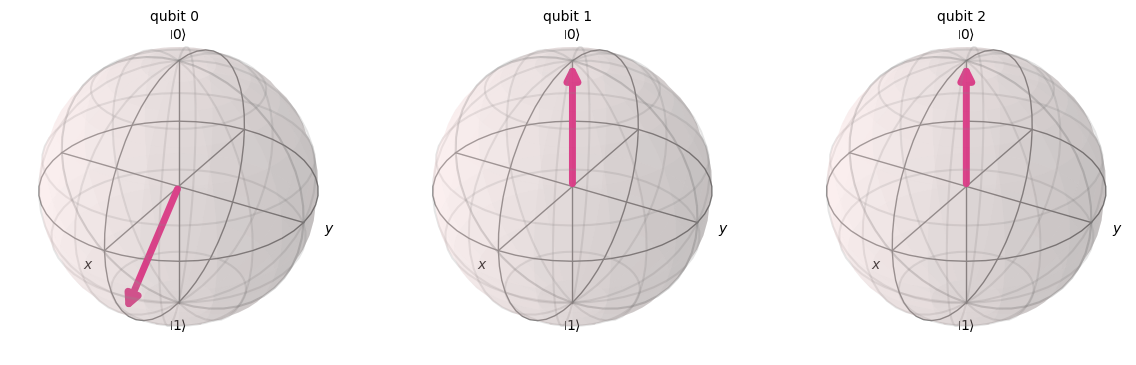

In [26]:
# Sorteia um estado quântico aleatório |psi⟩
alpha = random.random()
beta = np.sqrt(1 - alpha**2)
psi = [alpha, beta]

# Criar um circuito quântico com 3 qubits
qc = QuantumCircuit(3)

# Preparar o estado |psi⟩ no primeiro qubit
qc.initialize(psi, 0)
qc.save_statevector()
qc.measure_all()

# Visualizar o estado inicial do qubit de Alice
job = backend.run(qc)
result = job.result()
vetor = result.get_statevector()
plot_bloch_multivector(vetor)




Contagens: {'11': 250, '10': 245, '01': 267, '00': 262}


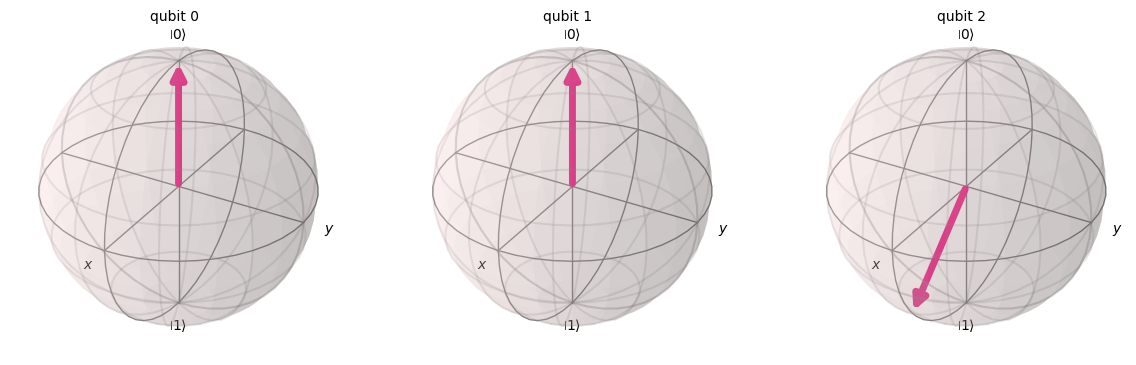

In [33]:
# Resetar o circuito
qc = QuantumCircuit(3, 2)

# Preparar o estado |psi⟩ no primeiro qubit
qc.initialize(psi, 0)

# Compartilhar o estado emaranhado entre Alice e Bob
qc.h(1)
qc.cx(1, 2)

# Alice aplica uma medição de Bell entre seus dois qubits
qc.cx(0, 1)
qc.h(0)
qc.measure([0, 1], [0, 1])

# Bob aplica correções baseadas nos bits clássicos recebidos
qc.cx(1, 2)
qc.cz(0, 2)

# Adiciona medidas finais para verificar o estado de Bob
qc.save_statevector()
qc.measure_all()


# Simulação do circuito
job = backend.run(qc)

result = job.result()

vetor = result.get_statevector()


# Visualização dos resultados
print("Contagens:", counts)
plot_histogram(counts)
plot_bloch_multivector(vetor)